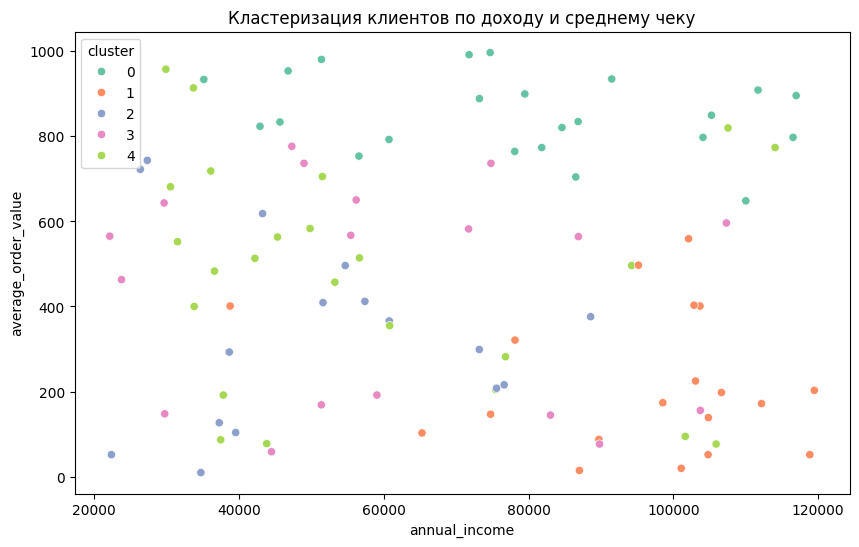

         customer_id  annual_income  spending_score  number_of_purchases  \
cluster                                                                    
0          43.826087   78787.304348       47.347826            18.608696   
1          55.105263   95099.421053       47.315789            18.105263   
2          43.500000   50484.062500       56.000000            19.625000   
3          66.944444   60290.666667       35.277778            27.000000   
4          45.583333   57762.000000       70.500000            37.333333   

               age  years_with_company  average_order_value  \
cluster                                                       
0        41.739130           12.304348           850.608696   
1        41.263158            8.578947           219.473684   
2        35.812500           14.000000           340.687500   
3        57.944444            6.555556           434.666667   
4        35.416667            6.916667           479.083333   

         activity_per_wee

In [20]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Генерация примерных данных о клиентах с дополнительными параметрами
data = {
    'customer_id': range(1, 101),
    'annual_income': np.random.randint(20000, 120000, 100),
    'spending_score': np.random.randint(1, 100, 100),
    'number_of_purchases': np.random.randint(1, 50, 100),
    'age': np.random.randint(18, 70, 100),
    'years_with_company': np.random.randint(1, 20, 100),
    'average_order_value': np.random.randint(10, 1000, 100),
    'product_category': np.random.choice(['electronics', 'fashion', 'home_goods', 'beauty'], 100),
    'activity_per_week': np.random.randint(1, 15, 100)
}

# Создание DataFrame
df = pd.DataFrame(data)

# Преобразование категориальных данных (например, продуктовых категорий) в числовой формат
df = pd.get_dummies(df, columns=['product_category'])

# Проверка на наличие всех категорий, если их нет, то добавляем их вручную с нулями
necessary_columns = ['product_category_electronics', 'product_category_fashion', 'product_category_home_goods', 'product_category_beauty']
for col in necessary_columns:
    if col not in df.columns:
        df[col] = 0  # если столбца нет, добавляем его с нулями

# Предварительная обработка данных (нормализация)
scaler = StandardScaler()
features_to_scale = ['annual_income', 'spending_score', 'number_of_purchases', 'age', 'years_with_company', 'average_order_value', 'activity_per_week']
scaled_features = scaler.fit_transform(df[features_to_scale])

# Добавление нормализованных категориальных признаков
scaled_features = np.hstack((scaled_features, df[necessary_columns].values))

# Выбор числа кластеров (в данном примере - 5)
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Визуализация кластеров по доходу и среднему чеку
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_income', y='average_order_value', hue='cluster', data=df, palette='Set2')
plt.title('Кластеризация клиентов по доходу и среднему чеку')
plt.show()

# Вывод информации о кластерах
print(df.groupby('cluster').mean())
